In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

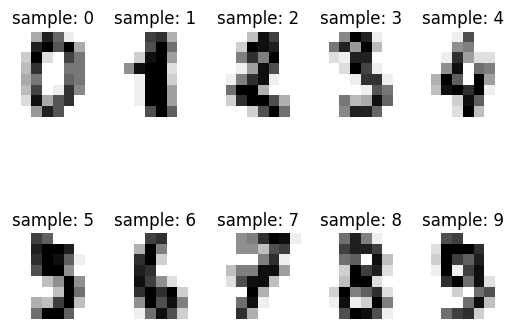

In [26]:
images_and_label = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_label[:10]):
    plt.subplot(2,5,index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i'%label)

In [27]:
x = digits.data
y = digits.target

In [28]:
import torch
import torch.nn as nn
from torch import optim

In [38]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 32)
        self.fc5 = nn.Linear(32, 16)
        self.fc6 = nn.Linear(16, 10)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc6(x)
        return x

In [39]:
model = Model()

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

losses = []

/var/folders/rl/48xkykxd2y7fqjn9cfxq1k1c0000gn/T/ipykernel_41511/1438478069.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
/var/folders/rl/48xkykxd2y7fqjn9cfxq1k1c0000gn/T/ipykernel_41511/1438478069.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.int64)


In [40]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, 100, loss.item()))
    losses.append(loss.item())

Epoch    0/100 Cost: 2.454136
Epoch   10/100 Cost: 2.030925
Epoch   20/100 Cost: 1.757017
Epoch   30/100 Cost: 1.474468
Epoch   40/100 Cost: 1.199518
Epoch   50/100 Cost: 0.961238
Epoch   60/100 Cost: 0.752618
Epoch   70/100 Cost: 0.583394
Epoch   80/100 Cost: 0.446503
Epoch   90/100 Cost: 0.335955


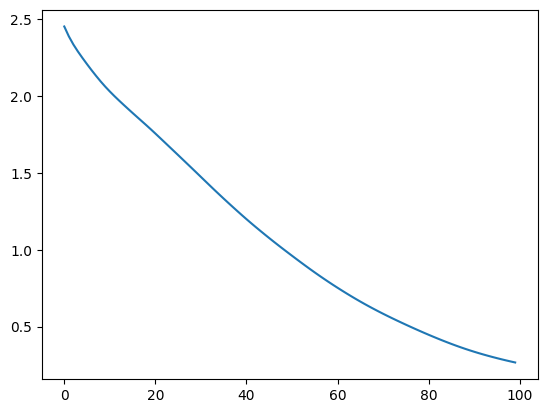

In [41]:
plt.plot(losses)